In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# set traditional Chinese display
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [2]:
!python transform_single.py

match_id: 23 finished
match_id: 24 finished
match_id: 25 finished
match_id: 26 finished
match_id: 28 finished
match_id: 29 finished
match_id: 30 finished
match_id: 31 finished
match_id: 32 finished
match_id: 33 finished
match_id: 34 finished
match_id: 35 finished
match_id: 36 finished
match_id: 37 finished
match_id: 38 finished
match_id: 39 finished
match_id: 40 finished
match_id: 41 finished
match_id: 42 finished
match_id: 43 finished
match_id: 44 finished
match_id: 45 finished
match_id: 46 finished
match_id: 47 finished
match_id: 48 finished
match_id: 49 finished
match_id: 50 finished
match_id: 51 finished
match_id: 52 finished
match_id: 53 finished
match_id: 54 finished
match_id: 55 finished
match_id: 56 finished
match_id: 57 finished
match_id: 58 finished
match_id: 59 finished
match_id: 60 finished
match_id: 61 finished
match_id: 62 finished
match_id: 63 finished
match_id: 64 finished
match_id: 65 finished
match_id: 66 finished
match_id: 67 finished
match_id: 68 finished
match_id: 

In [22]:
# Load the datasets
data = pd.read_csv('../output/Week7/convert_shot.csv', encoding='utf-8')
rally_data = pd.read_csv('../dataset/Single_Badminton_0108/rally_0108.csv', encoding='utf-8')
set_data = pd.read_csv('../dataset/Single_Badminton_0108/set_0108.csv', encoding='utf-8')

# Filter players
players_filtered = data

# Get the maximum shot number for each rally
max_shots_per_rally = players_filtered.groupby('rally_id')['shot_number'].max().reset_index()
max_shots_per_rally.columns = ['rally_id', 'max_shot_number']

# Merge the max_shots_per_rally back to the players_filtered
players_filtered = players_filtered.merge(max_shots_per_rally, on='rally_id', how='left')


# Initialize the list to collect rows
rows_win = []
rows_lose = []

# Initialize previous shot variable
prev = ""

# Iterate over the filtered DataFrame rows
for idx, row in players_filtered.iterrows():
    # Check ball type
    if row['shot_type'] in ['擋小球', '勾球', '放小球', '小平球']:
        row['shot_type'] = '網前小球'
    elif row['shot_type'] == '防守回挑':
        row['shot_type'] = '挑球'
    elif row['shot_type'] in ['防守回抽', '後場抽平球']:
        row['shot_type'] = '平球'
    elif row['shot_type'] == '過度切球':
        row['shot_type'] = '切球'
    elif row['shot_type'] in ['推球', '撲球']:
        row['shot_type'] = '推撲球'
    elif row['shot_type'] == '點扣':
        row['shot_type'] = '殺球'

    if row['shot_player'] != 1:
        prev = row["shot_type"]
        continue

    newrow = {
        "shot_id": row["shot_id"],
        "up_court": 0,
        "score": 0,
        "hit_x": None,
        "hit_y": None,
        "partner_x": None,
        "partner_y": None,
        # ball type we hit
        "shot_type": row["shot_type"],
        "opponent_shot_type": None,
        "cluster": None
    }
    if row['shot_player'] == 1:
        newrow["hit_x"] = row['player_location_x']
        newrow["hit_y"] = row['player_location_y']

    if newrow["hit_y"] > 67:
        newrow["up_court"] = 1
        newrow["hit_x"] = 61 - newrow["hit_x"]
        newrow["hit_y"] = 134 - newrow["hit_y"]

    newrow['opponent_shot_type'] = prev

    # Ensure only valid ball types are added
    newrow["shot_type"] = row["shot_type"]
    if newrow["shot_type"] == "未知球種" or newrow["opponent_shot_type"] == "未知球種":
        continue

    # Check if the current shot is one of the last two shots in the rally
    if row['shot_number'] >= row['max_shot_number'] - 1:
        rally_winner = rally_data[rally_data['rally_id'] == row['rally_id']]['rally_score_player'].values
        if rally_winner == 1:
            newrow["score"] = 1
            rows_win.append(newrow)
        else:
            newrow["score"] = -1
            rows_lose.append(newrow)

# Create a new DataFrame from the list of rows
win_df = pd.DataFrame(rows_win)
lose_df = pd.DataFrame(rows_lose)

# Define the desired column order
column_order = [
    "shot_id", "up_court", "hit_x", "hit_y",
    "opponent_shot_type", "shot_type", "score"
]

# Reorder the columns
win_df = win_df[column_order]
lose_df = lose_df[column_order]
print(win_df.shape)
print(lose_df.shape)

win_df.to_csv('../output/Week8/shot_win.csv', index=False, encoding='utf-8')
lose_df.to_csv('../output/Week8/shot_lose.csv', index=False, encoding='utf-8')

(1479, 7)
(1502, 7)


In [25]:
# Load the dataset from CSV file
win_df = win_df.sample(n=1000, random_state=1)
lose_df = lose_df.sample(n=1000, random_state=1)

# Open a file to write the output in XML format
output_file_path = '../output/Week8/others.txt'

with open(output_file_path, 'w') as f:
    # Write the header
    f.write('<data>\n')
    f.write('<meta>\n')
    f.write('<attributes>\n')

    # Write attributes - Adjust this part to match your attributes
    f.write('<attribute><type>Numerical</type><name>hit_x</name></attribute>\n')
    f.write('<attribute><type>Numerical</type><name>hit_y</name></attribute>\n')
    f.write('<attribute><type>Categorical</type><name>Categorical_1</name></attribute>\n')
    f.write('<attribute><type>Categorical</type><name>Categorical_2</name></attribute>\n')
    f.write('</attributes>\n')
    f.write('<hierarchy>\n')

    # Example hierarchy - Adjust as needed based on actual categorical values
    f.write('<Categorical_1 name="opponent_shot_type">\n')
    f.write('<![CDATA[<殺球></殺球><挑球></挑球><網前小球></網前小球><推撲球></推撲球><長球></長球><平球></平球><切球></切球><發長球></發長球><發短球></發短球>]]>\n')
    f.write('</Categorical_1>\n')
    f.write('<Categorical_2 name="shot_type">\n')
    f.write('<![CDATA[<殺球></殺球><挑球></挑球><網前小球></網前小球><推撲球></推撲球><長球></長球><平球></平球><切球></切球><發長球></發長球><發短球></發短球>]]>\n')
    f.write('</Categorical_2>\n')
    f.write('</hierarchy>\n')
    f.write('</meta>\n')
    f.write('<class>T</class>\n')
    f.write('<dataset>\n')

    # Write the dataset
    for index, row in win_df.iterrows():
        line = str(row['hit_x'])+'\t'+str(row['hit_y']) +'\t'+str(row['opponent_shot_type'])+'\t'+str(row['shot_type']) + '\n'
        f.write(line)
        
    for index, row in lose_df.iterrows():
        line = str(row['hit_x'])+'\t'+str(row['hit_y']) +'\t'+str(row['opponent_shot_type'])+'\t'+str(row['shot_type']) + '\n'
        f.write(line)

    # Close the dataset tag
    f.write('</dataset>\n')
    f.write('</data>\n')

print(f"Data has been successfully written to {output_file_path}")


Data has been successfully written to ../output/Week8/others.txt


In [61]:
# Run the mixed-type data clustering script on Linux
# preprocess: 
# 1. download required packages
# 2. modify the file path in Main.java
# 3. compile the Java code in terminal with: "javac -cp "libs/*:bin" -d bin $(find src -name '*.java')"
# 4. run the Java code in terminal with: "java -cp "libs/*:bin" Main"

In [29]:
# Load the clustering result from mixted-type data clustering
total_df = win_df.append(lose_df)
total_df = total_df.reset_index(drop=True)

data = pd.read_csv('../output/Week8/Final Result.csv', encoding='utf-8')
total_df['cluster'] = data['clusterid']
    
# plot the clustering result
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# data_indices = data.index
n = data['clusterid'].max() + 1
print(total_df.head())
for cluster in range(0, n):
    plt.figure(figsize=(9.15, 10.05))

    cluster_data = data[data['clusterid'] == cluster]
    print(len(cluster_data))
    if len(cluster_data) > 60:
        sample_cluster_data = cluster_data.sample(n=60, random_state=1)
    else:
        sample_cluster_data = cluster_data

    plt.scatter(sample_cluster_data['hit_x'], sample_cluster_data['hit_y'], color='r', label=f'Cluster {cluster} - Hit player')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(0, 61) 
    plt.ylim(0, 67) 
    plt.savefig(f'../output/Week8/_cluster_{cluster}_positions.jpg')
    plt.close()


   shot_id  up_court      hit_x      hit_y opponent_shot_type shot_type  \
0   119119         1  47.295555  36.525204               網前小球        挑球   
1   131232         1  27.630386  40.899894                 挑球        殺球   
2    56853         0  17.297651   9.516349                 長球        長球   
3   200820         0  50.768546  60.102034               網前小球       推撲球   
4    52905         0  17.203466  42.714526               網前小球       推撲球   

   score  cluster  
0      1        2  
1      1        6  
2      1        1  
3      1        2  
4      1        3  
267
248
195
208
178
1
180
159
199
190
174
1


In [39]:
total_df.to_csv('../output/Week8/clustered_data.csv', index=False, encoding='utf-8')

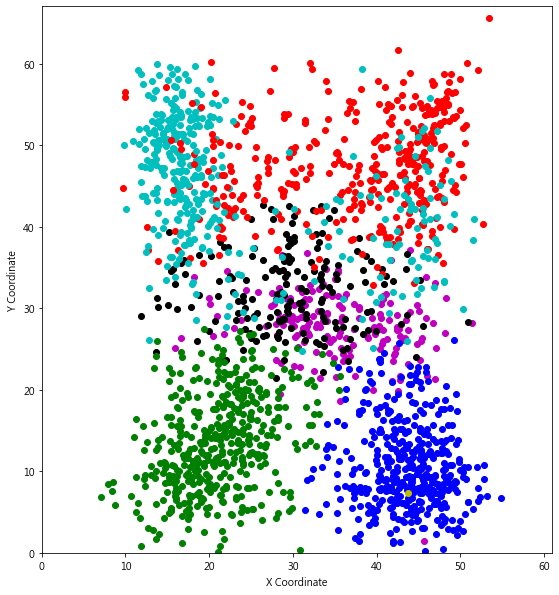

In [30]:
# plot all clustering results in one figure
plt.figure(figsize=(9.15, 10.05))
for cluster in range(n):
    cluster_data = data[data['clusterid'] == cluster]
    plt.scatter(cluster_data['hit_x'], cluster_data['hit_y'], 
        color=colors[cluster % len(colors)], label=f'Cluster {cluster} - Hit player')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 61) 
plt.ylim(0, 67)
# plt.legend()
plt.savefig(f'../output/Week8/clusters_positions.jpg')
plt.show()

In [38]:
# Define the ball types
ball_types = ["挑球", "殺球", "平球", "網前小球", "切球", "推撲球", "長球"]

# Transform one-hot encoding to ball type strings for the opponent's shots
for cluster in range(n):
    clustered_data = total_df[(total_df['cluster'] == cluster)]
    win_ratio = clustered_data['score'][clustered_data['score']==1].count()/clustered_data['shot_id'].count()
    lose_ratio = clustered_data['score'][clustered_data['score']==-1].count()/clustered_data['shot_id'].count()
    # Calculate winning rate and losing rate
    if abs(win_ratio - lose_ratio) > 0.1:
        print(f"Cluster {cluster} has a winning rate of {win_ratio} and a losing rate of {lose_ratio}")
        
        data_type = ['win', 'lose']
        for n, data in enumerate([win_df, lose_df]):
            data = data[data['shot_id'].isin(clustered_data['shot_id'])]
            matrix = pd.crosstab(data['opponent_shot_type'], data['shot_type'], dropna=False)
            matrix = matrix.reindex(index=ball_types, columns=ball_types, fill_value=0)
            
            # Calculate the percentage matrix
            matrix_percentage = matrix / matrix.values.sum() * 100

            plt.figure(figsize=(10, 8))
            sns.heatmap(matrix_percentage, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=ball_types, yticklabels=ball_types)
            plt.xlabel("Our hit ball type")
            plt.ylabel("Opponent's hit ball type")
            plt.yticks(rotation=45)
            plt.title(f'Confusion Matrix (Percentage) for Cluster {cluster} - {data_type[n]}')
            plt.savefig(f'../output/Week8/_cluster_{cluster}_confusion_matrix_percentage_{data_type[n]}.jpg')
            plt.close()
    


Cluster 4 has a winning rate of 0.33707865168539325 and a losing rate of 0.6629213483146067
Cluster 5 has a winning rate of 0.0 and a losing rate of 1.0


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Cluster 7 has a winning rate of 0.5786163522012578 and a losing rate of 0.42138364779874216
Cluster 8 has a winning rate of 0.5728643216080402 and a losing rate of 0.4271356783919598
Cluster 9 has a winning rate of 0.6210526315789474 and a losing rate of 0.37894736842105264
Cluster 11 has a winning rate of 0.0 and a losing rate of 1.0


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


In [35]:
# Check the clusters with less than 10 data points
for cluster in range(n):
    if total_df[total_df['cluster'] == cluster].shape[0] < 10:
        print("cluster", cluster)
        print(total_df[total_df['cluster'] == cluster])

cluster 5
      shot_id  up_court      hit_x     hit_y opponent_shot_type shot_type  \
1712    19763         0  43.805763  7.352143                 平球        切球   

      score  cluster  
1712     -1        5  
cluster 11
      shot_id  up_court      hit_x     hit_y opponent_shot_type shot_type  \
1576   116931         1  45.730256  1.390016                 挑球        長球   

      score  cluster  
1576     -1       11  
